#About Dataset
salaries dataset generally provides information about the employees of an organization in relation to their compensation. It typically includes details such as how much each employee is paid (their salary), their job titles, the departments they work in, and possibly additional information like their level of experience, education, and employment history within the organization.

# Features
- 'Id'
- 'EmployeeName'
- 'JobTitle'
- 'BasePay'
- 'OvertimePay'
- 'OtherPay'
- 'Benefits'
- 'TotalPay' -> salary
- 'TotalPayBenefits'
- 'Year'
- 'Notes'
- 'Agency'
- 'Status'


# Tasks

1. **Basic Data Exploration**: Identify the number of rows and columns in the dataset, determine the data types of each column, and check for missing values in each column.

2. **Descriptive Statistics**: Calculate basic statistics mean, median, mode, minimum, and maximum salary, determine the range of salaries, and find the standard deviation.

3. **Data Cleaning**: Handle missing data by suitable method with explain why you use it.

4. **Basic Data Visualization**: Create histograms or bar charts to visualize the distribution of salaries, and use pie charts to represent the proportion of employees in different departments.

5. **Grouped Analysis**: Group the data by one or more columns and calculate summary statistics for each group, and compare the average salaries across different groups.

6. **Simple Correlation Analysis**: Identify any correlation between salary and another numerical column, and plot a scatter plot to visualize the relationship.

8. **Summary of Insights**: Write a brief report summarizing the findings and insights from the analyses.

# Very Important Note
There is no fixed or singular solution for this assignment, so if anything is not clear, please do what you understand and provide an explanation.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

# Load your dataset
df = pd.read_csv('Salaries.csv')
df.head() 


,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN


Number of Rows and Columns

In [3]:
print("# of rows: " + str(len(df)))
print("# of columns: " + str(len(df.columns)))

# of rows: 148654
# of columns: 13


Data types of each column

In [4]:
print(df.dtypes)

Id                    int64
EmployeeName         object
JobTitle             object
BasePay             float64
OvertimePay         float64
OtherPay            float64
Benefits            float64
TotalPay            float64
TotalPayBenefits    float64
Year                  int64
Notes               float64
Agency               object
Status              float64
dtype: object


Checking for missing values

In [5]:
print(df.isnull().sum().sort_values(ascending=False))

Notes               148654
Status              148654
Benefits             36163
BasePay                609
OvertimePay              4
OtherPay                 4
Id                       0
EmployeeName             0
JobTitle                 0
TotalPay                 0
TotalPayBenefits         0
Year                     0
Agency                   0
dtype: int64


Basic Statistics

In [6]:
print("Mode:\t" + str(df["TotalPay"].mode()))
print(df["TotalPay"].agg(["mean", "median", "min", "max"]))

Mode:	0    0.0
Name: TotalPay, dtype: float64
mean       74768.321972
median     71426.610000
min         -618.130000
max       567595.430000
Name: TotalPay, dtype: float64


Range of Salaries

In [7]:
print(
    "Range of Salaries: ["
    + str(df["TotalPay"].min())
    + ", "
    + str(df["TotalPay"].max())
    + "]"
)

Range of Salaries: [-618.13, 567595.43]


Standard Deviation

In [8]:
print("std: " + str(df["TotalPay"].std()))

std: 50517.00527394987


Handling Missing Data

In [9]:
df["BasePay"] = df["BasePay"].fillna(df["BasePay"].mean())
df["Benefits"] = df["Benefits"].fillna(df["Benefits"].mean())
# Why we use mean?
# Because the mean is the average of the data, and it is the most common value in the data set.


Histograms or bar charts to visualize the distribution of salaries

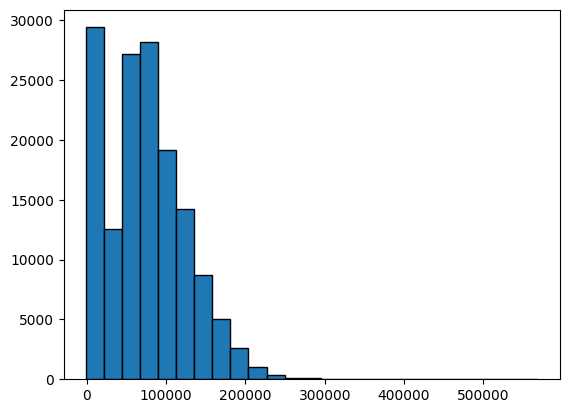

In [10]:
plt.hist(df["TotalPay"], bins=25, edgecolor="black")
plt.show()

Pie charts to represent the proportion of employees in different departments.

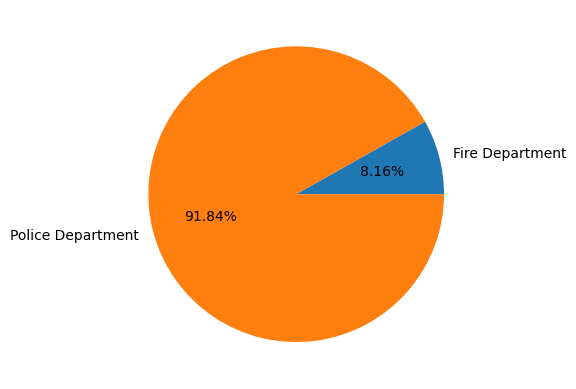

In [11]:
jobs = (
    df["JobTitle"]
    .loc[df["JobTitle"].str.contains(r"Department", regex=True)]
    .unique()
)
department = []
for i in jobs:
    match = re.search(r"(\w+)\s+(Department)", i)
    if match:
        department.append(match.group())
department = list(set(department))
counts = []
for i in department:
    counts.append(len(df[df["JobTitle"].str.contains(i)]))
plt.pie(counts,labels=department, autopct="%.2f%%")
plt.show()


Group data by one or more columns and calculate summary statistics for each group and compare the average salaries across different groups.

In [12]:
df.groupby(["Year"])["TotalPay"].describe()[["mean", "std", "count"]]

,mean,std,count
Year,,,
2011,71744.103871,47498.706594,36159.0
2012,74113.262265,49523.904319,36766.0
2013,77611.443142,52854.774783,37606.0
2014,75463.918140,51697.713029,38123.0


In [13]:
df['TotalPay'].corr(df['Year'])

0.032090397985590415

Correlation between salary and another numerical column and plot a scatter plot to visualize the relationship.

Correlation between TotalPay and BasePay: 0.9505142922626459


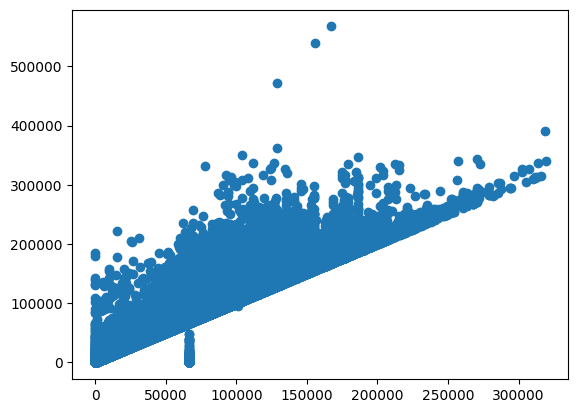

In [14]:
print(
    "Correlation between TotalPay and BasePay: "
    + str(df["TotalPay"].corr(df["BasePay"]))
)

plt.scatter(df["BasePay"], df["TotalPay"])
plt.show()

# Good Luck!